**Content**

In this file we preocess the reviews in different socialmedia platforms and predict whether they are positive, negative or neutral.

**Importing essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


**Data loading**

In [ ]:
df=pd.read_csv('/content/twitter_validation.csv',encoding='ISO-8859-1',header=None)
df.columns=['Id','Media','Target','Text']
df

,Id,Media,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


**Data Preprocessing**

In [ ]:
#First 5 values
df.head()

,Id,Media,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
#Last 5 values
df.tail()

,Id,Media,Target,Text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1000 non-null   int64 
 1   Media   1000 non-null   object
 2   Target  1000 non-null   object
 3   Text    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
#Columns of datset
df.columns

Index(['Id', 'Media', 'Target', 'Text'], dtype='object')

In [ ]:
#Datatype of each columns
df.dtypes

Id         int64
Media     object
Target    object
Text      object
dtype: object

In [ ]:
#Checking null values
df.isna().sum()

Id        0
Media     0
Target    0
Text      0
dtype: int64

In [ ]:
target=df['Target'].value_counts()
target

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

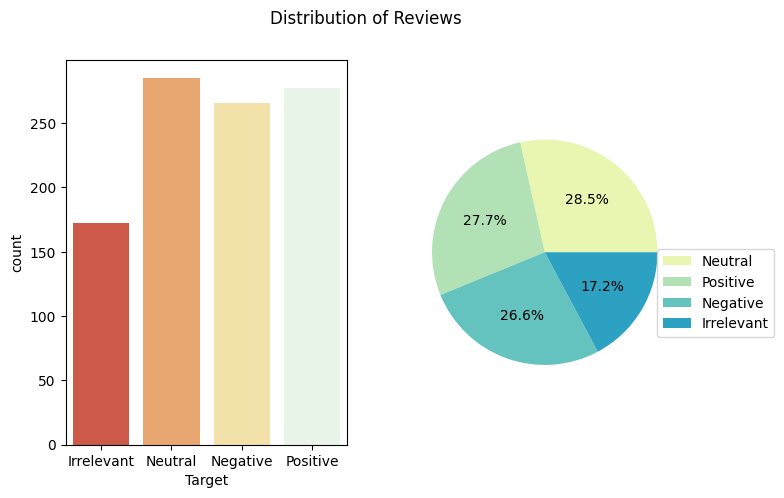

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution of Reviews")
plt.subplot(1,2,1)
palette=sns.color_palette("RdYlBu")
sns.countplot(x=df['Target'],data=df,palette=palette)

plt.subplot(1,2,2)
plt.pie(target,autopct='%1.1f%%',colors=sns.color_palette('YlGnBu'))
plt.legend(target.index,loc=(0.9,0.2))

In [ ]:
df['Media'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


[Text(0, 0, 'Facebook'),
 Text(1, 0, 'Amazon'),
 Text(2, 0, 'Microsoft'),
 Text(3, 0, 'CS-GO'),
 Text(4, 0, 'Google'),
 Text(5, 0, 'FIFA'),
 Text(6, 0, 'MaddenNFL'),
 Text(7, 0, 'TomClancysRainbowSix'),
 Text(8, 0, 'AssassinsCreed'),
 Text(9, 0, 'CallOfDuty'),
 Text(10, 0, 'Dota2'),
 Text(11, 0, 'Verizon'),
 Text(12, 0, 'NBA2K'),
 Text(13, 0, 'Nvidia'),
 Text(14, 0, 'GrandTheftAuto(GTA)'),
 Text(15, 0, 'RedDeadRedemption(RDR)'),
 Text(16, 0, 'Hearthstone'),
 Text(17, 0, 'ApexLegends'),
 Text(18, 0, 'Overwatch'),
 Text(19, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
 Text(20, 0, 'Borderlands'),
 Text(21, 0, 'PlayStation5(PS5)'),
 Text(22, 0, 'johnson&johnson'),
 Text(23, 0, 'Fortnite'),
 Text(24, 0, 'Xbox(Xseries)'),
 Text(25, 0, 'CallOfDutyBlackopsColdWar'),
 Text(26, 0, 'HomeDepot'),
 Text(27, 0, 'Cyberpunk2077'),
 Text(28, 0, 'TomClancysGhostRecon'),
 Text(29, 0, 'WorldOfCraft'),
 Text(30, 0, 'LeagueOfLegends'),
 Text(31, 0, 'Battlefield')]

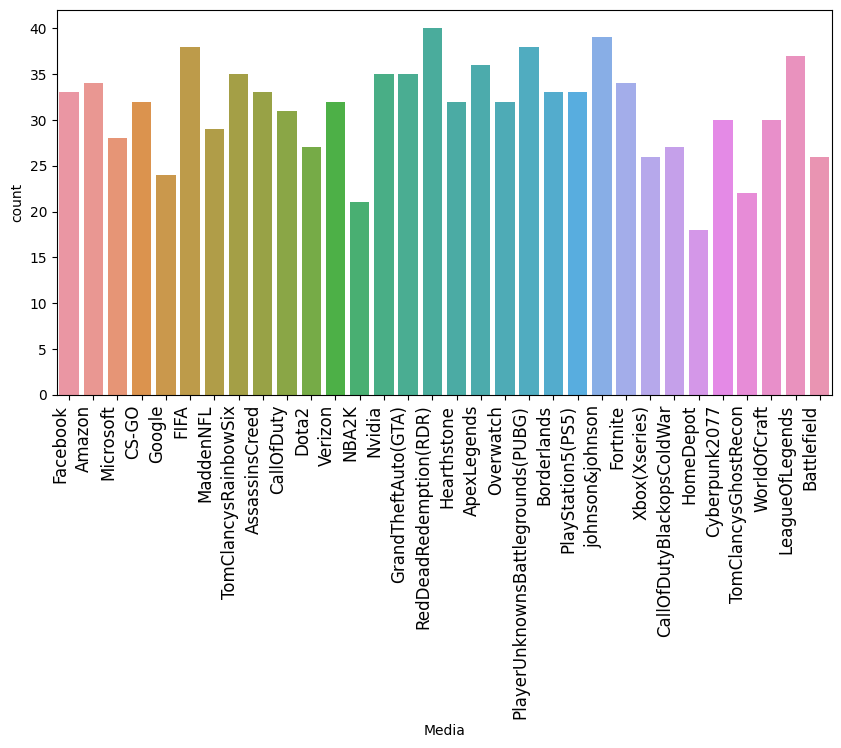

In [ ]:
plt.figure(figsize=(10,5))
chart=sns.countplot(x=df['Media'],data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right',fontweight='light',fontsize='large')


<ipython-input-13-137dd5a5f0fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Sales Dataset')

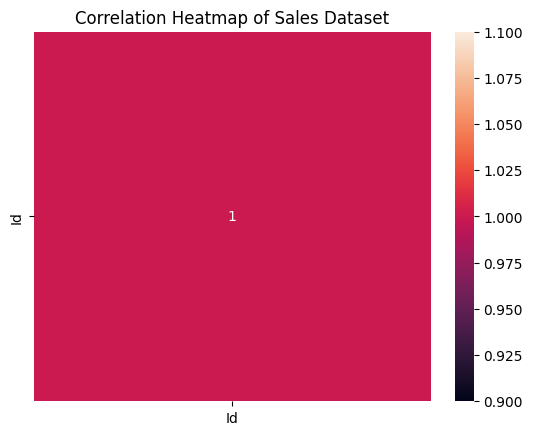

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Heatmap of Sales Dataset')


Removing reviews which are irrelevant.

In [ ]:
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)

In [ ]:
df['Target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.drop(['Id','Media'],axis=1,inplace=True)

In [ ]:
df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
tweet=df.Text
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()

In [ ]:
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweet

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-23-8bdf2b3e6acb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweet.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
tweet=tweet.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
tweet

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweet

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: Text, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweet)


In [ ]:
print(train_data)

  (0, 691)	0.2608257828483461
  (0, 1004)	0.2608257828483461
  (0, 1130)	0.23509805002803952
  (0, 1996)	0.13277165480466424
  (0, 309)	0.22681557001542715
  (0, 860)	0.17354914655342313
  (0, 807)	0.21432663830218204
  (0, 2761)	0.2608257828483461
  (0, 568)	0.2608257828483461
  (0, 1833)	0.24577602391989378
  (0, 633)	0.22681557001542715
  (0, 376)	0.1515362387424402
  (0, 2287)	0.38864111655856126
  (0, 538)	0.49155204783978756
  (1, 797)	0.4055823664694651
  (1, 2891)	0.4055823664694651
  (1, 2558)	0.3821800909185634
  (1, 1405)	0.4055823664694651
  (1, 3679)	0.36557591217188057
  (1, 2462)	0.3126902562590763
  (1, 3639)	0.26216072802580975
  (1, 2155)	0.24555654927912696
  (2, 1427)	0.1689251539717079
  (2, 486)	0.36574263611909275
  (2, 3432)	0.36574263611909275
  :	:
  (825, 3393)	0.3395996844494919
  (825, 3383)	0.2560582225152134
  (825, 631)	0.22981061112100945
  (825, 997)	0.2315686698425631
  (825, 3373)	0.21750175079084832
  (825, 3226)	0.2904718522758868
  (825, 2527)	0.1

In [ ]:
x=train_data
y=df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Decision Tree Accuracy",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Decision Tree Accuracy 0.4979919678714859
[[45 24 10]
 [24 34 21]
 [25 21 45]]
              precision    recall  f1-score   support

          -1       0.48      0.57      0.52        79
           0       0.43      0.43      0.43        79
           1       0.59      0.49      0.54        91

    accuracy                           0.50       249
   macro avg       0.50      0.50      0.50       249
weighted avg       0.50      0.50      0.50       249



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Random Forest Accuracy",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))